In [14]:
import h5py 
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Checking prescale features
This is the prescaled dataset

(61832690, 14)
(61832690,)


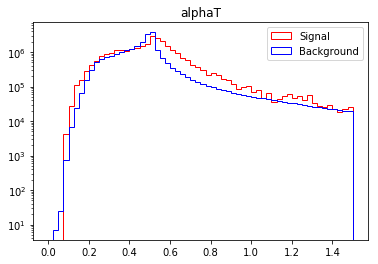

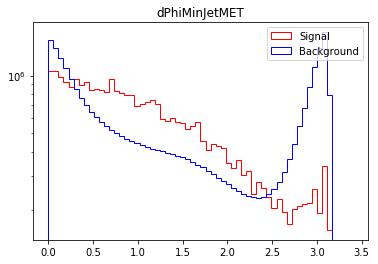

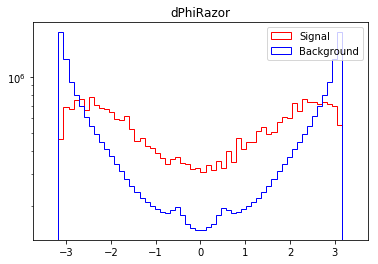

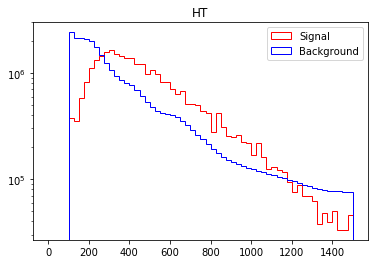

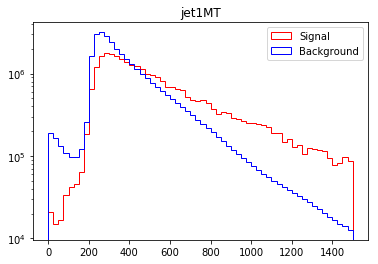

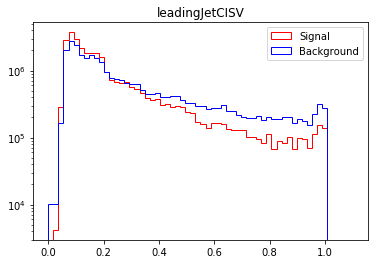

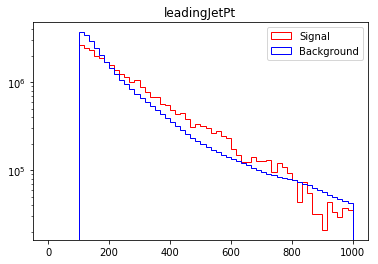

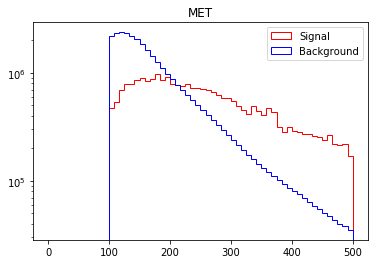

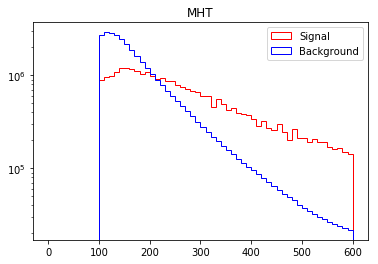

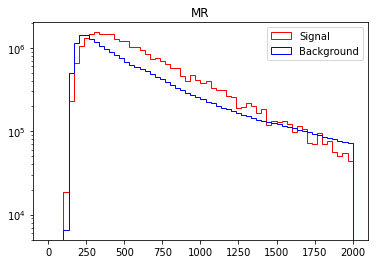

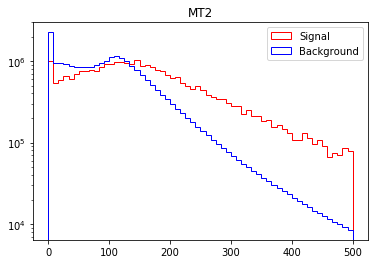

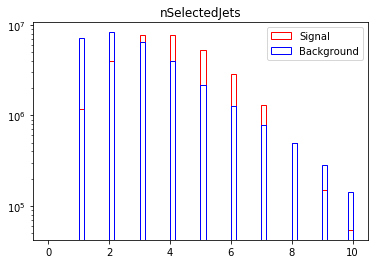

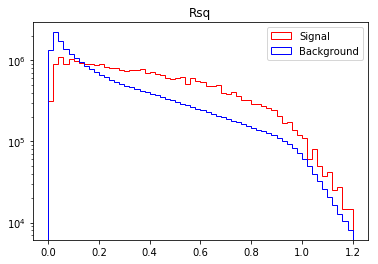

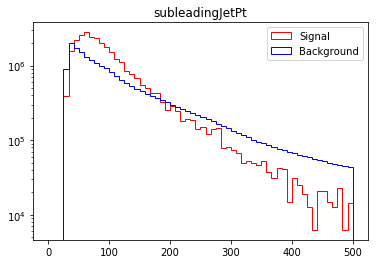

In [2]:
data = h5py.File("/bigdata/shared/analysis/CombinedDataset_Balanced.h5")
data.keys()
x_data = data['Training'][:]
label = x_data[:,0]
feature = x_data[:,2:]
print (feature.shape)
print (label.shape)
bkg_data = feature[np.where(label<0.5)]
sn_data = feature[np.where(label>0.5)]
def plot_compare_range(bkg_data, sn_data, order, label='', xlow=0, xhigh=1000):
    plt.figure()
    plt.hist(sn_data[:,order], bins=60, range=(xlow,xhigh), histtype='step', color='r', label='Signal')
    plt.hist(bkg_data[:,order], bins=60, range=(xlow, xhigh), histtype='step', color='b', label='Background')
    plt.title(label)
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
plot_compare_range(bkg_data, sn_data, 0, 'alphaT', 0, 1.5)
plot_compare_range(bkg_data, sn_data, 1, 'dPhiMinJetMET', 0., 3.4)
plot_compare_range(bkg_data, sn_data, 2, 'dPhiRazor', -3.4, 3.4)
plot_compare_range(bkg_data, sn_data, 3, 'HT', 0, 1500)
plot_compare_range(bkg_data, sn_data, 4, 'jet1MT', 0, 1500)
plot_compare_range(bkg_data, sn_data, 5, 'leadingJetCISV', 0, 1.1)
plot_compare_range(bkg_data, sn_data, 6, 'leadingJetPt', 0, 1000)
plot_compare_range(bkg_data, sn_data, 7, 'MET', 0, 500)
plot_compare_range(bkg_data, sn_data, 8, 'MHT', 0, 600)
plot_compare_range(bkg_data, sn_data, 9, 'MR', 0, 2000)
plot_compare_range(bkg_data, sn_data, 10, 'MT2', 0, 500)
plot_compare_range(bkg_data, sn_data, 11, 'nSelectedJets', 0, 10)
plot_compare_range(bkg_data, sn_data, 12, 'Rsq', 0, 1.2)
plot_compare_range(bkg_data, sn_data, 13, 'subleadingJetPt',0, 500)
data.close()

Confusion matrix, without normalization
[[ 1.         -0.72194941  0.99029482  0.34010374  0.18772473  0.04657947
   0.25662691  0.11518894  0.13573248  0.48772194  0.73949276  0.55735364
   0.99158481  0.52432546]
 [-0.72194941  1.         -0.73658496 -0.53666387 -0.27007389 -0.0608443
  -0.46034822 -0.01996303 -0.03811779 -0.61262557 -0.29587694 -0.65180797
  -0.73529027 -0.6034866 ]
 [ 0.99029482 -0.73658496  1.          0.34601098  0.19063269  0.04726375
   0.26184098  0.11457595  0.13501232  0.49444733  0.74045319  0.56491856
   0.99871855  0.53053047]
 [ 0.34010374 -0.53666387  0.34601098  1.          0.5561597   0.07161663
   0.93972312  0.18670521  0.22259369  0.89860794  0.1783706   0.64356872
   0.34405399  0.91592103]
 [ 0.18772473 -0.27007389  0.19063269  0.5561597   1.          0.04861804
   0.7126501   0.78887659  0.78685087  0.47151912  0.29111496  0.23640828
   0.19067091  0.44765972]
 [ 0.04657947 -0.0608443   0.04726375  0.07161663  0.04861804  1.          0.066249
  

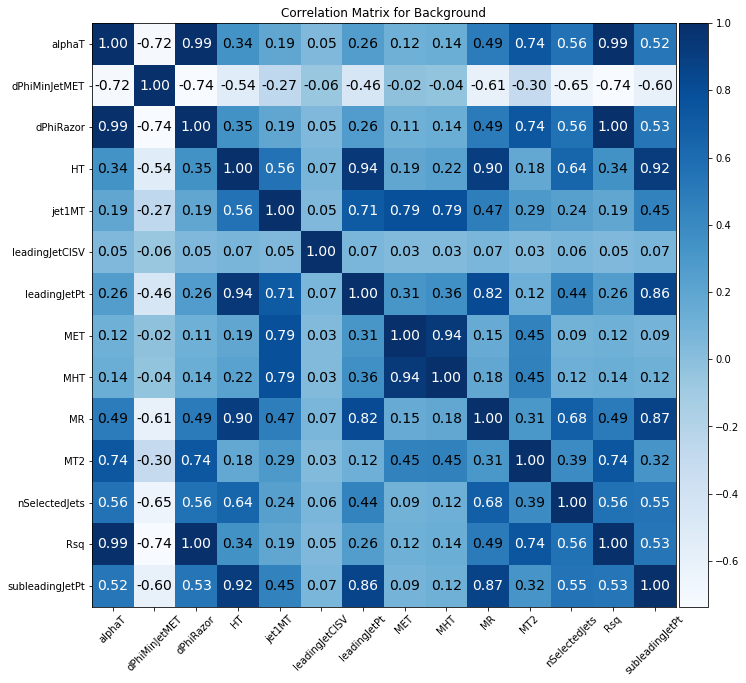

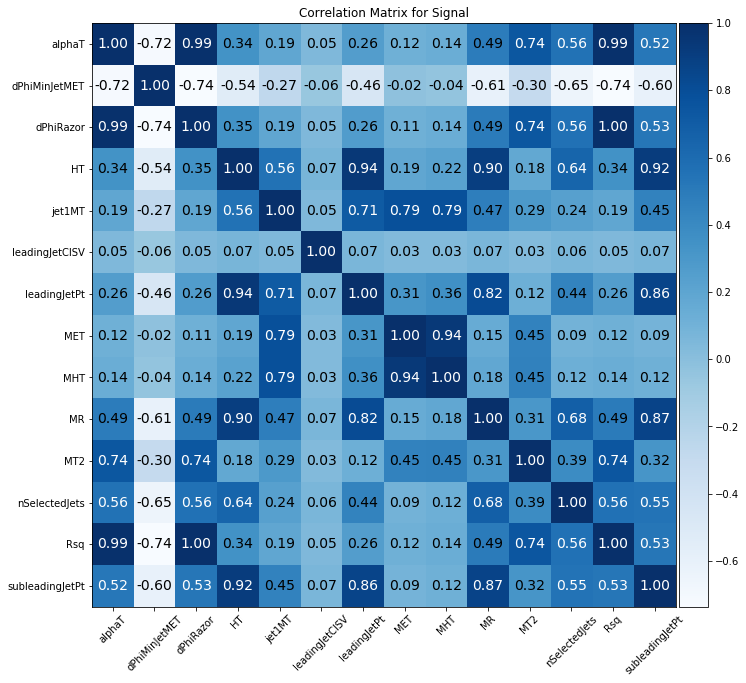

In [13]:
corr_bkg = np.corrcoef(bkg_data, rowvar=0)
corr_sn = np.corrcoef(bkg_data, rowvar=0)
from utils import plot_confusion_matrix
plot_confusion_matrix(corr_bkg,['alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT',
                            'leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2',
                            'nSelectedJets','Rsq','subleadingJetPt'],
                      title='Correlation Matrix for Background',
                      size=(10,10),
                      show_num=True,
                      show_label=False)
plot_confusion_matrix(corr_sn,['alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT',
                            'leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2',
                            'nSelectedJets','Rsq','subleadingJetPt'],
                      title='Correlation Matrix for Signal',
                      size=(10,10),
                      show_num=True,
                      show_label=False)

### Checking postscaled features
This is the direct input of the neural network, aka, post-scaled features.

Labels:'alphaT','dPhiMinJetMET','dPhiRazor','HT','jet1MT','leadingJetCISV','leadingJetPt','MET','MHT','MR','MT2','nSelectedJets','Rsq','subleadingJetPt'

(100000, 14)
(100000,)


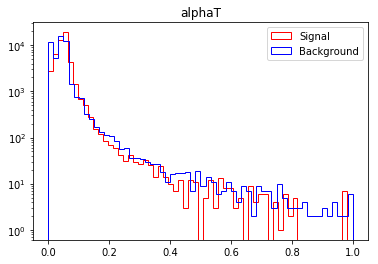

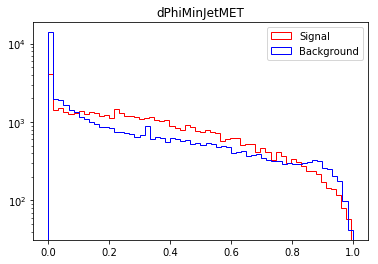

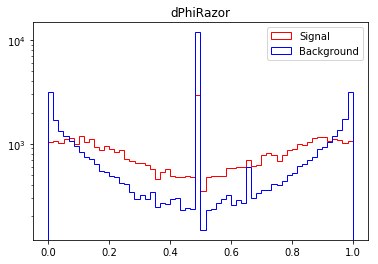

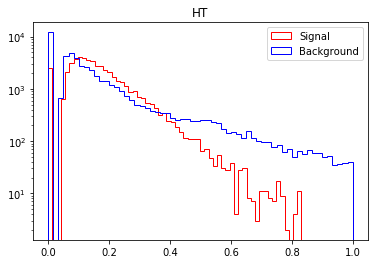

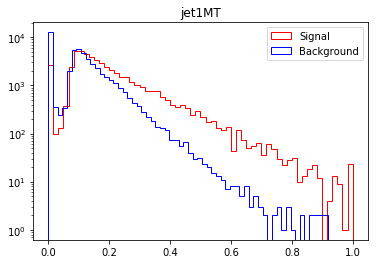

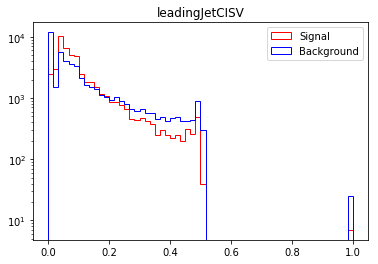

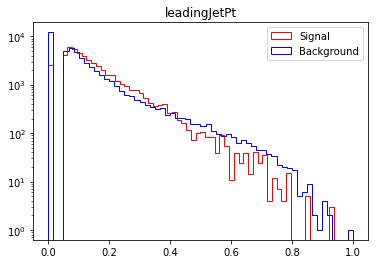

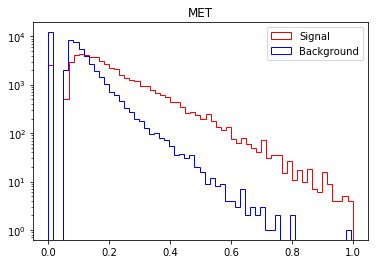

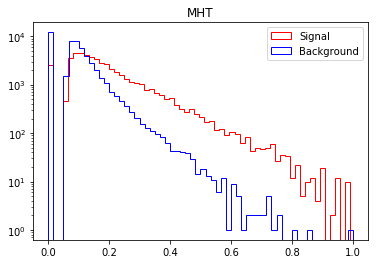

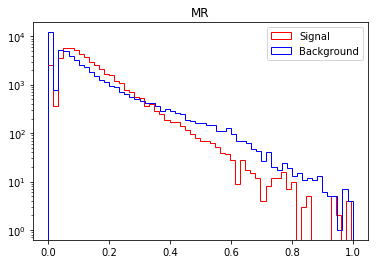

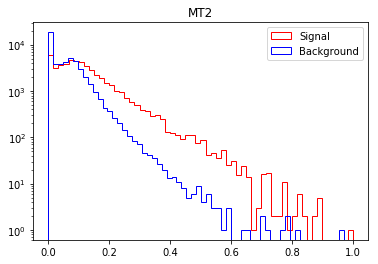

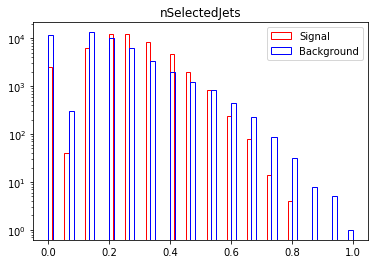

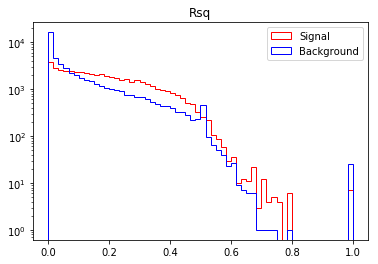

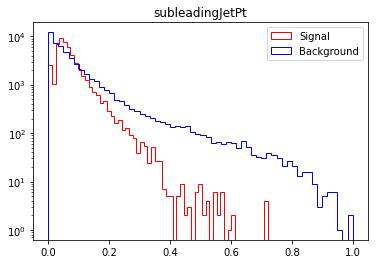

In [28]:
test = h5py.File("ScaledInput/TrainingDataset.h5")
test.keys()
test['x'].shape
test['y'].shape
y = test['y']
y_num = np.argmax(y,axis=1)
x = test['x'][:]
print (x.shape)
print (y_num.shape)
bkg = x[np.where(y_num<0.5)]
sn = x[np.where(y_num>0.5)]
def plot_compare(bkg, sn, order, label=''):
    plt.figure()
    plt.hist(sn[:,order], bins=60, histtype='step', color='r', label='Signal')
    plt.hist(bkg[:,order], bins=60, histtype='step', color='b', label='Background')
    plt.title(label)
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
plot_compare(bkg, sn, 0, 'alphaT')
plot_compare(bkg, sn, 1, 'dPhiMinJetMET')
plot_compare(bkg, sn, 2, 'dPhiRazor')
plot_compare(bkg, sn, 3, 'HT')
plot_compare(bkg, sn, 4, 'jet1MT')
plot_compare(bkg, sn, 5, 'leadingJetCISV')
plot_compare(bkg, sn, 6, 'leadingJetPt')
plot_compare(bkg, sn, 7, 'MET')
plot_compare(bkg, sn, 8, 'MHT')
plot_compare(bkg, sn, 9, 'MR')
plot_compare(bkg, sn, 10, 'MT2')
plot_compare(bkg, sn, 11, 'nSelectedJets')
plot_compare(bkg, sn, 12, 'Rsq')
plot_compare(bkg, sn, 13, 'subleadingJetPt')
test.close()

---
### Check the output score of the validation sample

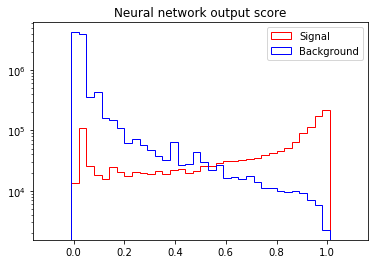

In [18]:
valrel = h5py.File("Result/ValidationResult1000000_Adam.h5","r")
valrel.keys()
val_pred = valrel['Prediction'][:,1]
val_truth = valrel['Truth'][:]
val_weight = valrel['Weight'][:]
val_sn = val_pred[np.where(val_truth>0.5)]
val_bkg = val_pred[np.where(val_truth<0.5)]
weight_sn = val_weight[np.where(val_truth>0.5)]
weight_bkg = val_weight[np.where(val_truth<0.5)]
plt.figure()
plt.hist(val_sn, weights=weight_sn, bins=40, range=(-0.1,1.1), histtype='step', color='r', label='Signal')
plt.hist(val_bkg, weights=weight_bkg, bins=40, range=(-0.1,1.1), histtype='step', color='b', label='Background')
plt.title('Neural network output score')
plt.legend(loc='best')
plt.yscale('log')
plt.show()
valrel.close()

---
### Benchmark study for optimizers, using 1M event sample

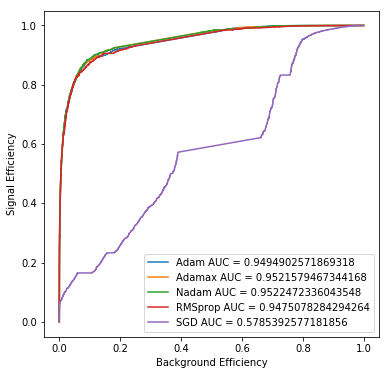

In [30]:
def get_roc_curve(label=''):
    valrel = h5py.File("Result/ValidationResult1000000_{}.h5".format(label),"r")
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    fpr, tpr, thresholds = roc_curve(val_truth, val_pred, sample_weight=val_weight)
    return fpr, tpr
def plot_roc(label=''):
    fpr, tpr = get_roc_curve(label)
    area = auc(fpr, tpr, reorder=True)
    plt.plot(fpr,tpr,label="{} AUC = {}".format(label, area))
plt.figure(figsize=(6.,6.))
plot_roc('Adam')
plot_roc('Adamax')
plot_roc('Nadam')
plot_roc('RMSprop')
plot_roc('SGD')
plt.ylabel('Signal Efficiency')
plt.xlabel('Background Efficiency')
plt.legend(loc='best')
plt.show()

### Retune using GridSearchCV

    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    layers = [1, 3, 5]
    where layers is defined as:
        for ly in range(layers):
        size = int(100/(ly+1))
        if ly==0:
            model.add(Dense(size, input_shape=(14,), activation='relu'))
        else:
            model.add(Dense(size, activation='relu'))
            
<strong>Best: 0.853338 using {'optimizer': 'Nadam', 'layers': 5}</strong> <br>
0.782973 (0.000990) with: {'optimizer': 'SGD', 'layers': 1} <br>
0.791824 (0.002088) with: {'optimizer': 'RMSprop', 'layers': 1}<br>
0.785968 (0.000984) with: {'optimizer': 'Adagrad', 'layers': 1}<br>
0.788673 (0.000991) with: {'optimizer': 'Adadelta', 'layers': 1}<br>
0.791928 (0.000936) with: {'optimizer': 'Adam', 'layers': 1}<br>
0.791443 (0.000284) with: {'optimizer': 'Adamax', 'layers': 1}<br>
0.795010 (0.000462) with: {'optimizer': 'Nadam', 'layers': 1}<br>
0.785690 (0.000504) with: {'optimizer': 'SGD', 'layers': 3}<br>
0.821409 (0.001923) with: {'optimizer': 'RMSprop', 'layers': 3}<br>
0.792868 (0.001444) with: {'optimizer': 'Adagrad', 'layers': 3}<br>
0.800426 (0.001143) with: {'optimizer': 'Adadelta', 'layers': 3}<br>
0.815632 (0.001344) with: {'optimizer': 'Adam', 'layers': 3}<br>
0.808452 (0.001584) with: {'optimizer': 'Adamax', 'layers': 3}<br>
0.838061 (0.004248) with: {'optimizer': 'Nadam', 'layers': 3}<br>
0.786088 (0.001916) with: {'optimizer': 'SGD', 'layers': 5}<br>
0.835910 (0.007522) with: {'optimizer': 'RMSprop', 'layers': 5}<br>
0.796855 (0.002135) with: {'optimizer': 'Adagrad', 'layers': 5}<br>
0.818701 (0.001206) with: {'optimizer': 'Adadelta', 'layers': 5}<br>
0.824210 (0.005068) with: {'optimizer': 'Adam', 'layers': 5}<br>
0.821119 (0.001973) with: {'optimizer': 'Adamax', 'layers': 5}<br>
0.853338 (0.002919) with: {'optimizer': 'Nadam', 'layers': 5}<br>


---
### Try a bigger network (Default 3 hidden layer size: 100, 30, 10)

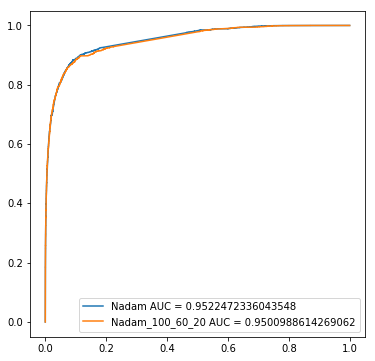

In [8]:
plt.figure(figsize=(6,6))
plot_roc('Nadam')
plot_roc('Nadam_100_60_20')
plt.legend(loc='best')
plt.show()

Bigger doesn't mean better. Stick with (100, 30, 10) architecture.

---
### Training on full dataset (60 M events)

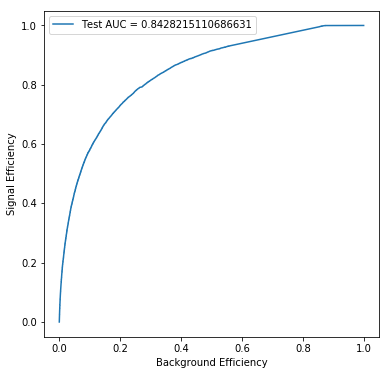

In [29]:
def get_roc_curve(file_name=''):
    valrel = h5py.File(file_name,"r")
    assert(valrel)
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    fpr, tpr, thresholds = roc_curve(val_truth, 
                                     val_pred, 
                                     #sample_weight=val_weight
                                    )
    return fpr, tpr
def plot_roc(file_name='',label=''):
    fpr, tpr = get_roc_curve(file_name)
    area = auc(fpr, tpr, reorder=True)
    plt.plot(fpr,tpr,label="{} AUC = {}".format(label, area))
plt.figure(figsize=(6.,6.))
#plot_roc("Result/ValidationResult0_Nadam.h5",'Validation')
plot_roc("Result/TestResult0_Nadam.h5",'Test')
#plot_roc("Result/TrainResult0_Nadam.h5",'Train')
plt.ylabel('Signal Efficiency')
plt.xlabel('Background Efficiency')
plt.legend(loc='best')
plt.show()

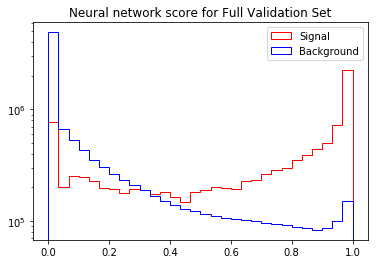

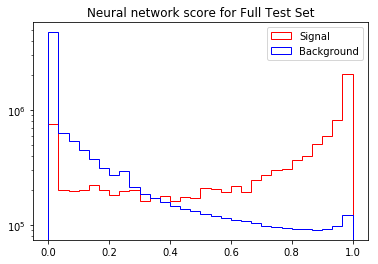

In [28]:
def get_score(file_name='', title=''):
    valrel = h5py.File(file_name,"r")
    assert valrel
    valrel.keys()
    val_pred = valrel['Prediction'][:,1]
    val_truth = valrel['Truth'][:]
    val_weight = valrel['Weight'][:]
    val_sn = val_pred[np.where(val_truth>0.5)]
    val_bkg = val_pred[np.where(val_truth<0.5)]
    weight_sn = val_weight[np.where(val_truth>0.5)]
    weight_bkg = val_weight[np.where(val_truth<0.5)]
    plt.figure()
    n_sn, bins_sn, _ = plt.hist(val_sn, 
                                #weights=weight_sn, 
                                bins=30, range=(0,1), histtype='step', color='r', label='Signal')
    n_bkg, bins_bkg, _ = plt.hist(val_bkg, 
                                  #weights=weight_bkg, 
                                  bins=30, range=(0,1), histtype='step', color='b', label='Background')
    plt.title('Neural network score for {}'.format(title))
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()
    valrel.close()
    return bins_sn, n_sn, n_bkg
get_score("Result/ValidationResult0_Nadam.h5", "Full Validation Set")
bins, n_sn, n_bkg = get_score("Result/TestResult0_Nadam.h5", "Full Test Set")
with h5py.File("Result/Template0.h5","w") as out:
    out.create_dataset("Bins",data=bins)
    out.create_dataset("Signal",data=n_sn)
    out.create_dataset("Background",data=n_bkg)

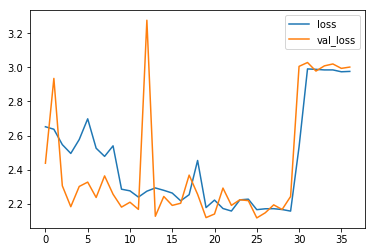

In [33]:
import pickle

history = pickle.load(open("History/history0.sav","rb"))
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

Save best only, so only the checkpoint at epoch ~25 were used to predict the test set.